<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>


---

## Assignment 1: U.N. World Happiness Data
*Oliver Hegi (omh2115)*

This file can also be found on GitHub https://github.com/oliverhegi/QMSS_Project_1

This is my submission for the first group project on the U.N. World Happiness Data. The document contains nine sections. The first three sections are the setup of the data and the objects needed for the submissions to the leaderboard. The following sections are the data exploration, the models, and the accompanying interpretations.




## 1. Get data in and set up X_train, X_test, y_train objects

In [3]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.

In [4]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [6]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [10]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [11]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

##3. Fit model on preprocessed data and save preprocessor function and model 


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=3)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8636363636363636

#### Save preprocessor function to local "preprocessor.zip" file

In [13]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [14]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Bivariate Analysis

In [66]:
X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [78]:
y_train_labels.unique()

array(['Average', 'High', 'Very High', 'Low', 'Very Low'], dtype=object)

In [79]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(y_train_labels)

Text(0.5, 1.0, 'First two columns vs target in color')

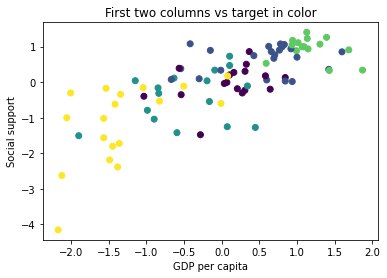

In [200]:
fig, ax = plt.subplots()
ax.scatter(preprocessor(X_train)[:,0], preprocessor(X_train)[:,1], c=integer_encoded)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Social support')
ax.set_title('First two columns vs target in color')

Text(0.5, 1.0, 'First two columns vs target in color')

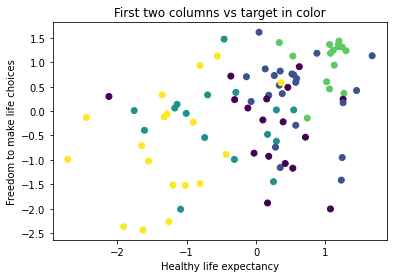

In [201]:
fig, ax = plt.subplots()
ax.scatter(preprocessor(X_train)[:,2], preprocessor(X_train)[:,3], c=integer_encoded)
ax.set_xlabel('Healthy life expectancy')
ax.set_ylabel('Freedom to make life choices')
ax.set_title('First two columns vs target in color')

The two bivariate plots above show that the first two columns (GDP per capita and social support) contain a lot of information to segment the data to predict happiness. This tells us that GDP and social support are important predictors, far more than columns 3 and 4 (healthy life expectancy and freedom to make life choices).

A principle component analysis will shed more insight into the predictors.

In [36]:
from sklearn.decomposition import PCA
pca_WH = PCA(n_components = 6)
PCA_2 = pca_WH.fit_transform(preprocessor(X_train))

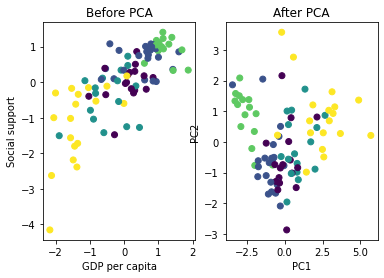

In [202]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(preprocessor(X_train)[:,0], preprocessor(X_train)[:,1], c=integer_encoded)
axes[0].set_xlabel('GDP per capita')
axes[0].set_ylabel('Social support')
axes[0].set_title('Before PCA')
axes[1].scatter(PCA_2[:,0], PCA_2[:,1], c=integer_encoded)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

The chart above compares two loading vectors from a PCA to the first two columns. If the data were able to be broken down into (any) two features, the PCA plot would show prefectly segmentable data. This is not the case, which shows that more than two features are needed. As such, a bivariate analysis is not the best way to predict happiness.

## 5. Three best individual models


In [86]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [87]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [88]:
# Model 1
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model_1 = GradientBoostingClassifier(n_estimators=52, learning_rate=1.115, max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model_1.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model_1.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"5"},
                                 print_output = True,
                                 input_dict=None)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 771

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [127]:
# Model 2
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model_2 = Sequential()
keras_model_2.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model_2.add(Dense(64, activation='relu'))
keras_model_2.add(Dense(64, activation='relu'))
keras_model_2.add(Dense(32, activation='relu'))

keras_model_2.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model_2.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 10, 
               epochs = 150, validation_split=0.25)  

Epoch 1/150
7/7 [==============================] - 1s 37ms/step - loss: 1.5978 - accuracy: 0.1818 - val_loss: 1.5977 - val_accuracy: 0.1364
Epoch 2/150
7/7 [==============================] - 0s 9ms/step - loss: 1.5826 - accuracy: 0.2576 - val_loss: 1.5892 - val_accuracy: 0.0909
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 1.5684 - accuracy: 0.3182 - val_loss: 1.5809 - val_accuracy: 0.0909
Epoch 4/150
7/7 [==============================] - 0s 10ms/step - loss: 1.5533 - accuracy: 0.3333 - val_loss: 1.5724 - val_accuracy: 0.0909
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 1.5398 - accuracy: 0.3788 - val_loss: 1.5630 - val_accuracy: 0.1818
Epoch 6/150
7/7 [==============================] - 0s 10ms/step - loss: 1.5233 - accuracy: 0.4242 - val_loss: 1.5510 - val_accuracy: 0.2273
Epoch 7/150
7/7 [==============================] - 0s 9ms/step - loss: 1.5080 - accuracy: 0.5152 - val_loss: 1.5402 - val_accuracy: 0.2727
Epoch 8/150
7/7 [=======

In [91]:
# Submit keras model
from aimodelshare.aimsonnx import model_to_onnx
onnx_model = model_to_onnx(keras_model_2, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
prediction_column_index=keras_model_2.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                custom_metadata={"team":"5"})

3/3 [==============================] - 0s 3ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 774

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [128]:
# Model 3
feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model_3 = Sequential()
keras_model_3.add(Dense(10, input_dim=feature_count, activation='relu'))

keras_model_3.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model_3.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 200, validation_split=0.25)  

Epoch 1/200
4/4 [==============================] - 0s 59ms/step - loss: 1.9203 - accuracy: 0.2121 - val_loss: 1.8977 - val_accuracy: 0.3182
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 1.8974 - accuracy: 0.2273 - val_loss: 1.8812 - val_accuracy: 0.3182
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 1.8780 - accuracy: 0.2727 - val_loss: 1.8600 - val_accuracy: 0.2727
Epoch 4/200
4/4 [==============================] - 0s 15ms/step - loss: 1.8559 - accuracy: 0.2727 - val_loss: 1.8455 - val_accuracy: 0.3182
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 1.8384 - accuracy: 0.2727 - val_loss: 1.8232 - val_accuracy: 0.3182
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 1.8169 - accuracy: 0.2727 - val_loss: 1.8012 - val_accuracy: 0.3182
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 1.7955 - accuracy: 0.2727 - val_loss: 1.7833 - val_accuracy: 0.3182
Epoch 8/200
4/4 [===

In [ ]:
# Submit keras model
from aimodelshare.aimsonnx import model_to_onnx
onnx_model = model_to_onnx(keras_model_3, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
prediction_column_index=keras_model_3.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                custom_metadata={"team":"5"})

The three models above all perform reasonably well in terms of their F1 Score. 

The GBM model performs best, then the NN with reduced batch size, and third the NN with only two hidden layers (F1 Score 50.23, 42.75, and 38.97 respectively).

## 6. Feature extraction from the initial models

In [215]:
# Recreate the column names for the transformed predictors
transformed_features = numeric_features + list(X_train['region'].unique()) + list(X_train['sub-region'].unique())

In [126]:
pd.DataFrame({'col_name': model.feature_importances_}, index=transformed_features).sort_values(by='col_name', ascending=False)

,col_name
Generosity,7.002207e-01
GDP per capita,1.683770e-01
Social support,4.536925e-02
Healthy life expectancy,2.621260e-02
Terrorist_attacks,2.153775e-02
Perceptions of corruption,1.083657e-02
Freedom to make life choices,1.009284e-02
Sub-Saharan Africa,9.037059e-03
Southern Europe,4.237651e-03
Australia and New Zealand,2.820842e-03


The table above shows the features in order as they were used by the gradient boosting machine used for model 1.

Here the three most important features were generosity, GDP per capita, and social support. This is in line with the bivariate analysis performed in the beginning of this document.

In [211]:
import shap
explainer = shap.KernelExplainer(keras_model_2, preprocessor(X_test))
SHAPS_NN = explainer.shap_values(preprocessor(X_test))

  0%|          | 0/68 [00:00<?, ?it/s]

In [171]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], SHAPS_NN[0][0], feature_names=transformed_features)

The SHAP values allow us to examine the features that were relevant for making a single prediction in the Neural Network.

The above illustration is for Bulgaria in model 2. It showed that the freedom to make life choices and social support were the most important features.

In [194]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], SHAPS_NN[0][21], feature_names=transformed_features)

The SHAP values above are for the U.S. and show that GDP per capita and social support are the most important factors.

These findings also show that the feature importance can vary by a large degree between models.

In [214]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], SHAPS_NN[1], feature_names=transformed_features)

The chart above shows the SHAP values for all predictors for all countries, ordered by the output value (happiest to the left and least happy to the right). This chart shows that there is diversity in feature importance and not every ouput can be predicted with the same features.

## 7. Group models

The following models were devised by the entire team to maximize F1 Score.

In [195]:
# Model 4
from sklearn.ensemble import RandomForestClassifier

#Example code to fit model:
model_4 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0).fit(preprocessor(X_train), y_train_labels)
model_4.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_4, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model_4.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"5"},
                                 print_output = True,
                                 input_dict=None)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 798

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [196]:
# Model 5
from sklearn.ensemble import BaggingClassifier

#Example code to fit model:
model_5 = BaggingClassifier(n_estimators=50, n_jobs=3, random_state=0).fit(preprocessor(X_train), y_train_labels)
model_5.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_5, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model_5.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"5"},
                                 print_output = True,
                                 input_dict=None)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 803

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [197]:
# Model 6
from sklearn.svm import SVC

#Example code to fit model:
model_6 = SVC(C=1, degree=3, gamma='scale', kernel='rbf', cache_size=200).fit(preprocessor(X_train), y_train_labels)
model_6.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_6, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model_6.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"5"},
                                 print_output = True,
                                 input_dict=None)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 807

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## 8. Analysis of the group models

In [205]:
explainer = shap.TreeExplainer(model_4)
SHAPS_Tree = explainer.shap_values(preprocessor(X_test))

In [212]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], SHAPS_Tree[1], feature_names=transformed_features)

In [213]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], SHAPS_Tree[0], feature_names=transformed_features)

The two charts above, reiterate the same findings from the SHAP charts for the neural network: the relative feature importance varies by sample. For example, GDP per capita is able to explain happiness for many of the countries but does not work at all for some – as evidenced by the peaks and trophs in the second chart.

## 9. Conclusion

The analysis conducted presents two main findings:

1. The richness of the data is limited and does not benefit from highly complex models such as neural networks and gradient boosting machines. As such, simpler models, such as random forest, outperformed more complex models. Simpler tree-based ensembling models were able to benefit from more depth in each tree whereas gradient boosting trees would overfit the data very quickly. 

2. The analysis of the SHAP values has shown that the relative feature-importance varies dramatically between observations. The happiness of some countries can be predicted with just GDP per capita and social support. Other countries require a combination of other predictors. This, along with a relatively low overall F1 Score / accuracy suggests that (self-reported) happiness is quite challenging to predict, even with a pannel of predictors. 